# **미니프로젝트 4차 1대1 문의 내용 유형 분류기**
# 단계3 : Text classification

### 문제 정의
> 1:1 문의 내용 분류 문제<br>
> 1. 문의 내용 분석
> 2. 문의 내용 분류 모델 성능 평가
### 학습 데이터
> * 1:1 문의 내용 데이터 : train.csv

### 변수 소개
> * text : 문의 내용
> * label : 문의 유형

### References
> * Machine Learning
>> * [sklearn-tutorial](https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html)
> * Deep Learning
>> * [Google Tutorial](https://developers.google.com/machine-learning/guides/text-classification)
>> * [Tensorflow Tutorial](https://www.tensorflow.org/tutorials/keras/text_classification)
>> * [Keras-tutorial](https://keras.io/examples/nlp/text_classification_from_scratch/)
>> * [BERT-tutorial](https://www.tensorflow.org/text/guide/bert_preprocessing_guide)

## 1. 개발 환경 설정

### 1-1. 라이브러리 설치

In [ ]:
# 필요 라이브러리부터 설치할께요.
!pip install konlpy pandas seaborn gensim wordcloud python-mecab-ko wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 78.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.6/575.6 KB 56.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 KB 46.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 17.0 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9676 sha256=8efbd330cd7a6748623060e50539f7fac45db084957b9dc9b38c8b2c9860b217
  Stored in directory: /root/.cache/pip/wheels/04/5f/3e/46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget


### 1-2. 라이브러리 import

In [ ]:
from mecab import MeCab
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wget,os
from IPython.display import display
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import tensorflow as tf
import nltk
import wget,os

### 1-3. 한글 글꼴 설정(Windows)

In [ ]:
# if not os.path.exists("malgun.ttf"): 
#     wget.download("https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf")
# if 'malgun' not in fm.fontManager.findfont("Malgun Gothic"):
#     fm.fontManager.addfont("malgun.ttf")
# if plt.rcParams['font.family']!= ["Malgun Gothic"]:
#     plt.rcParams['font.family']= [font for font in fm.fontManager.ttflist if 'malgun.ttf' in font.fname][-1].name
# plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결
# assert plt.rcParams['font.family'] == ["Malgun Gothic"], "한글 폰트가 설정되지 않았습니다."
# FONT_PATH = "malgun.ttf"

In [ ]:
# !sudo apt-get install -y fonts-nanum

### 1-4. 자바 경로 설정(Windows)

In [ ]:
# os.environ['JAVA_HOME'] = "C:\Program Files\Java\jdk-19"

### 1-3. 한글 글꼴 설정(Colab)

In [ ]:
!sudo apt-get install -y fonts-nanum

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 3s (3,299 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122349 files and di

In [ ]:
FONT_PATH = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=FONT_PATH, size=10).get_name()
fm.fontManager.addfont(FONT_PATH)
print(font_name)
plt.rcParams['font.family']=font_name
assert plt.rcParams['font.family'] == [font_name], "한글 폰트가 설정되지 않았습니다."

NanumGothic


### 1-4. 구글드라이브 연결(Colab)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2. 전처리한 데이터 불러오기
* 1, 2일차에 전처리한 데이터를 불러옵니다.
* sparse data에 대해서는 scipy.sparse.load_npz 활용

In [ ]:
import scipy.sparse

In [ ]:
# ngram
ngram_x_train = scipy.sparse.load_npz('/content/drive/MyDrive/13 Mini Project04/ngram_x_train.npz')
ngram_y_train = pd.read_csv('/content/drive/MyDrive/13 Mini Project04/ngram_y_train.csv')
ngram_x_val = scipy.sparse.load_npz('/content/drive/MyDrive/13 Mini Project04/ngram_x_val.npz')
ngram_y_val = pd.read_csv('/content/drive/MyDrive/13 Mini Project04/ngram_y_val.csv')

print(ngram_x_train.shape, ngram_y_train.shape)
print(ngram_x_val.shape, ngram_y_val.shape)

# seq
seq_x_train = pd.read_csv('/content/drive/MyDrive/13 Mini Project04/seq_x_train.csv')
seq_y_train = pd.read_csv('/content/drive/MyDrive/13 Mini Project04/seq_y_train.csv')
seq_x_val = pd.read_csv('/content/drive/MyDrive/13 Mini Project04/seq_x_val.csv')
seq_y_val = pd.read_csv('/content/drive/MyDrive/13 Mini Project04/seq_y_val.csv')

print(seq_x_train.shape, seq_y_train.shape)
print(seq_x_val.shape, seq_y_val.shape)

(2964, 1576) (2964, 1)
(742, 1576) (742, 1)
(2964, 196) (2964, 1)
(742, 196) (742, 1)


In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/13 Mini Project04/train_data.csv')
val_data = pd.read_csv('/content/drive/MyDrive/13 Mini Project04/val_data.csv')

print(train_data.shape, train_data.shape)
print(val_data.shape, val_data.shape)

(2964, 2) (2964, 2)
(742, 2) (742, 2)


## 3. Machine Learning(N-grams)
* N-gram으로 전처리한 데이터를 이용하여 3개 이상의 Machine Learning 모델 학습 및 성능 분석
> * [sklearn-tutorial](https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html)

In [ ]:
result_f1_scores = {}

### 3-1. Model 1 : [KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)



In [ ]:
ngram_y_train.shape

(2964, 1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, f1_score

In [ ]:
# 정규화
x_max, x_min = ngram_x_train.max(), ngram_x_train.min()
ngram_x_train_n = (ngram_x_train - x_min) / (x_max - x_min)
ngram_x_val_n = (ngram_x_val - x_min) / (x_max - x_min)

print(ngram_x_train_n.max(), ngram_x_train_n.min())

1.0 0.0


In [ ]:
# 모델
model_knn = KNeighborsClassifier()  # n_neighbors=5

# 학습
model_knn.fit(ngram_x_train_n, ngram_y_train.values.ravel())

KNeighborsClassifier()

In [ ]:
# 예측
y_pred_knn = model_knn.predict(ngram_x_val_n)

# 평가
print(classification_report(ngram_y_val, y_pred_knn))
print(f1_score(ngram_y_val, y_pred_knn, average='macro'))

              precision    recall  f1-score   support

           0       0.50      0.83      0.62       317
           1       0.50      0.24      0.32       156
           2       0.51      0.27      0.36       129
           3       0.62      0.32      0.42       120
           4       0.60      0.45      0.51        20

    accuracy                           0.51       742
   macro avg       0.55      0.42      0.45       742
weighted avg       0.53      0.51      0.48       742

0.44686241463562115


* 참고) [y.shape 관련 오류](https://stackoverflow.com/questions/34165731/a-column-vector-y-was-passed-when-a-1d-array-was-expected)

In [ ]:
result_f1_scores['KNeighborsClassifier'] = f1_score(ngram_y_val, y_pred_knn, average='macro')

### 3-2. Model 2 : [DecisionTree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, f1_score

In [ ]:
# 모델
model_dtc = DecisionTreeClassifier() # max_depth=None

# 학습
model_dtc.fit(ngram_x_train, ngram_y_train)

DecisionTreeClassifier()

In [ ]:
# 예측
y_pred_dtc = model_dtc.predict(ngram_x_val)

# 평가
print(classification_report(ngram_y_val, y_pred_dtc))
print(f1_score(ngram_y_val, y_pred_dtc, average='macro'))

              precision    recall  f1-score   support

           0       0.55      0.69      0.61       317
           1       0.53      0.37      0.43       156
           2       0.45      0.39      0.41       129
           3       0.45      0.40      0.42       120
           4       0.53      0.45      0.49        20

    accuracy                           0.52       742
   macro avg       0.50      0.46      0.47       742
weighted avg       0.51      0.52      0.51       742

0.4739506064556268


In [ ]:
result_f1_scores['DecisionTreeClassifier'] = f1_score(ngram_y_val, y_pred_dtc, average='macro')

### 3-3. Model 3 : [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score

In [ ]:
# 모델
model_lr = LogisticRegression()  # max_iter=100

# 학습
model_lr.fit(ngram_x_train, ngram_y_train.values.ravel())

LogisticRegression()

In [ ]:
# 예측
y_pred_lr = model_lr.predict(ngram_x_val)

# 평가
print(classification_report(ngram_y_val, y_pred_lr))
print(f1_score(ngram_y_val, y_pred_lr, average='macro'))

              precision    recall  f1-score   support

           0       0.56      0.87      0.68       317
           1       0.64      0.35      0.45       156
           2       0.62      0.37      0.46       129
           3       0.72      0.45      0.55       120
           4       0.90      0.45      0.60        20

    accuracy                           0.59       742
   macro avg       0.69      0.50      0.55       742
weighted avg       0.62      0.59      0.57       742

0.548990834253203


In [ ]:
result_f1_scores['LogisticRegression'] = f1_score(ngram_y_val, y_pred_lr, average='macro')

### 3-4. Model 4 : [SVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, f1_score

In [ ]:
# 정규화
x_max, x_min = ngram_x_train.max(), ngram_x_train.min()
ngram_x_train_n = (ngram_x_train - x_min) / (x_max - x_min)
ngram_x_val_n = (ngram_x_val - x_min) / (x_max - x_min)

print(ngram_x_train_n.max(), ngram_x_train_n.min())

1.0 0.0


In [ ]:
# 모델
model_svc = SVC()  # kerne='rbf' C=1.0

# 학습
model_svc.fit(ngram_x_train_n, ngram_y_train.values.ravel())

SVC()

In [ ]:
# 예측
y_pred_svc = model_svc.predict(ngram_x_val_n)

# 평가
print(classification_report(ngram_y_val, y_pred_svc))
print(f1_score(ngram_y_val, y_pred_svc, average='macro'))

              precision    recall  f1-score   support

           0       0.48      0.93      0.63       317
           1       0.75      0.19      0.31       156
           2       0.66      0.15      0.24       129
           3       0.63      0.28      0.39       120
           4       1.00      0.40      0.57        20

    accuracy                           0.52       742
   macro avg       0.70      0.39      0.43       742
weighted avg       0.61      0.52      0.46       742

0.4284965273756819


In [ ]:
result_f1_scores['SVC'] = f1_score(ngram_y_val, y_pred_svc, average='macro')

### 3-5. Model 5 : [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score

In [ ]:
# 모델
model_rfc = RandomForestClassifier(random_state=2023)  # n_estimators=100 max_depth=None

# 학습
model_rfc.fit(ngram_x_train, ngram_y_train.values.ravel())

RandomForestClassifier(random_state=2023)

In [ ]:
# 예측
y_pred_rfc = model_rfc.predict(ngram_x_val)

# 평가
print(classification_report(ngram_y_val, y_pred_rfc))
print(f1_score(ngram_y_val, y_pred_rfc, average='macro'))

              precision    recall  f1-score   support

           0       0.58      0.75      0.65       317
           1       0.62      0.41      0.49       156
           2       0.44      0.36      0.39       129
           3       0.55      0.51      0.53       120
           4       0.53      0.45      0.49        20

    accuracy                           0.56       742
   macro avg       0.55      0.49      0.51       742
weighted avg       0.56      0.56      0.55       742

0.5119545304319355


In [ ]:
result_f1_scores['RandomForestClassifier'] = f1_score(ngram_y_val, y_pred_rfc, average='macro')

### 3-6. Model 6 : XGBoost


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, f1_score

In [ ]:
# 모델
model_xgb = XGBClassifier(random_state=2023)

# 학습
model_xgb.fit(ngram_x_train, ngram_y_train.values.ravel())

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
# 예측
y_pred_xgb = model_xgb.predict(ngram_x_val)

# 평가
print(classification_report(ngram_y_val, y_pred_xgb))
print(f1_score(ngram_y_val, y_pred_xgb, average='macro'))

              precision    recall  f1-score   support

           0       0.54      0.88      0.67       317
           1       0.72      0.34      0.46       156
           2       0.54      0.32      0.40       129
           3       0.66      0.37      0.47       120
           4       0.90      0.45      0.60        20

    accuracy                           0.57       742
   macro avg       0.67      0.47      0.52       742
weighted avg       0.61      0.57      0.54       742

0.5199454062561479


In [ ]:
result_f1_scores['XGBClassifier'] = f1_score(ngram_y_val, y_pred_xgb, average='macro')

* 성능 시각화

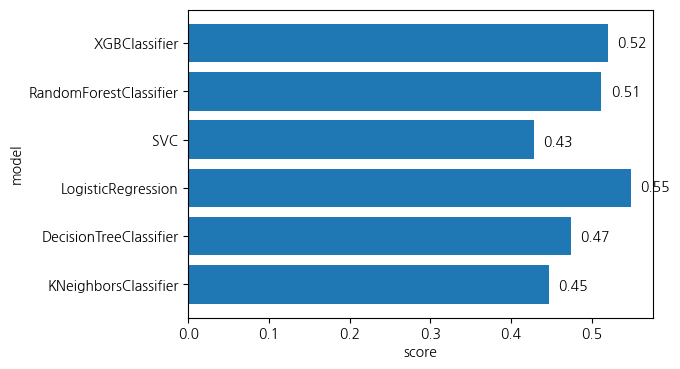

In [ ]:
plt.figure(figsize=(6, 4))
bar = plt.barh(y=list(result_f1_scores), width=result_f1_scores.values())

for rect in bar:
    width = rect.get_width()
    plt.text(width + 0.03, rect.get_y() + width/2.0, '%.2f'%width, ha='center', va='bottom', size=10)

plt.xlabel('score')
plt.ylabel('model')

plt.show()

### 3-7. Hyperparameter Tuning(Optional) 
* Manual Search, Grid search, Bayesian Optimization, TPE...
> * [grid search tutorial sklearn](https://scikit-learn.org/stable/modules/grid_search.html)
> * [optuna tutorial](https://optuna.org/#code_examples)
> * [ray-tune tutorial](https://docs.ray.io/en/latest/tune/examples/tune-sklearn.html)

In [ ]:
from sklearn.model_selection import GridSearchCV

### 3-8. Model 7 : LogisticRegressionGS


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler 

In [ ]:
# MaxAbsScaler
scaler = MaxAbsScaler()
scaler.fit(ngram_x_train)
ngram_x_train_n = scaler.transform(ngram_x_train)
ngram_x_val_n = scaler.transform(ngram_x_val)

print(ngram_x_train_n.max(), ngram_x_train_n.min())

1.0 0.0


In [ ]:
model_lr = LogisticRegression(max_iter=50000)

In [ ]:
# 모델 튜닝
params = {'max_iter':[50, 100, 200], 'C':[0.01, 0.1, 0.5, 1]}
# C : Cost. 값이 크면 훈련 복잡.(default=1)
# max_iter : Gradient Descent 방식 몇 번 반복 수행할 것인지.(default=100)

In [ ]:
# 모델
model_lr_gs = GridSearchCV(model_lr,
                           params,
                           cv=10,
                           scoring='f1_macro')

# 학습
model_lr_gs.fit(ngram_x_train_n, ngram_y_train.values.ravel())

In [ ]:
# 예측
y_pred_lr_gs = model_lr_gs.predict(ngram_x_val_n)

# 평가
print(classification_report(ngram_y_val, y_pred_lr_gs))
print(f1_score(ngram_y_val, y_pred_lr_gs, average='macro'))

              precision    recall  f1-score   support

           0       0.53      0.90      0.67       317
           1       0.72      0.28      0.40       156
           2       0.60      0.32      0.42       129
           3       0.72      0.41      0.52       120
           4       1.00      0.45      0.62        20

    accuracy                           0.58       742
   macro avg       0.71      0.47      0.53       742
weighted avg       0.63      0.58      0.54       742

0.5252294562107709


In [ ]:
result_f1_scores['LogisticRegressionGS'] = f1_score(ngram_y_val, y_pred_lr_gs, average='macro')

### 3-9. Model 8 : [XGBClassifierGS](https://xgboost.readthedocs.io/en/stable/parameter.html)


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, f1_score

In [ ]:
# 모델 튜닝
params = {'n_estimators':[100, 150,],   # tree 개수.(default=100)
          'learning_rate':[0.1, 0.3, 0.5],  # 높을수록 Overfitting하기 쉬움.(default=0.3)
          'max_depth':[3, 6, 10],  # 최대 트리의 깊이.(default=6)
          }

In [ ]:
# 모델
model_xgb_gs = GridSearchCV(model_xgb,
                           params,
                           cv=10,
                           scoring='f1_macro')

# 학습
model_xgb_gs.fit(ngram_x_train, ngram_y_train.values.ravel())

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None,
                                     objective='multi:softprob', predictor=None, ...),
             param_grid={'learning_rate': [0.1, 0.3, 0.5],
                         'max_depth': [3, 6, 10], 'n_estimators': [100, 150]},
             scoring='f1_macro')

In [ ]:
# 예측
y_pred_xgb_gs = model_xgb_gs.predict(ngram_x_val)

# 평가
print(classification_report(ngram_y_val, y_pred_xgb_gs))
print(f1_score(ngram_y_val, y_pred_xgb_gs, average='macro'))

              precision    recall  f1-score   support

           0       0.55      0.87      0.67       317
           1       0.70      0.34      0.46       156
           2       0.51      0.33      0.40       129
           3       0.68      0.42      0.52       120
           4       0.90      0.45      0.60        20

    accuracy                           0.58       742
   macro avg       0.67      0.48      0.53       742
weighted avg       0.60      0.58      0.55       742

0.5287318698191679


In [ ]:
result_f1_scores['XGBClassifierGS'] = f1_score(ngram_y_val, y_pred_xgb_gs, average='macro')

### 3-10. Model 9 : RandomForestClassifierHT


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score

In [ ]:
# 모델 튜닝
params = {'n_estimators':[50, 100, 150, 200], # (default=100)
          'max_depth':[3, 6, 9],  # (default=None) 
          }

In [ ]:
# 모델
model_rfc_gs = GridSearchCV(model_rfc,
                           params,
                           cv=10,
                           scoring='f1_macro')

# 학습
model_rfc_gs.fit(ngram_x_train, ngram_y_train.values.ravel())

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=2023),
             param_grid={'max_depth': [3, 6, 9],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='f1_macro')

In [ ]:
# 예측
y_pred_rfc_gs = model_rfc_gs.predict(ngram_x_val)

# 평가
print(classification_report(ngram_y_val, y_pred_rfc_gs))
print(f1_score(ngram_y_val, y_pred_rfc_gs, average='macro'))

              precision    recall  f1-score   support

           0       0.45      1.00      0.62       317
           1       0.86      0.04      0.07       156
           2       0.92      0.09      0.17       129
           3       1.00      0.07      0.12       120
           4       1.00      0.30      0.46        20

    accuracy                           0.47       742
   macro avg       0.85      0.30      0.29       742
weighted avg       0.72      0.47      0.34       742

0.2895417526626396


In [ ]:
result_f1_scores['RandomForestClassifierGS'] = f1_score(ngram_y_val, y_pred_rfc_gs, average='macro')

* 성능 시각화

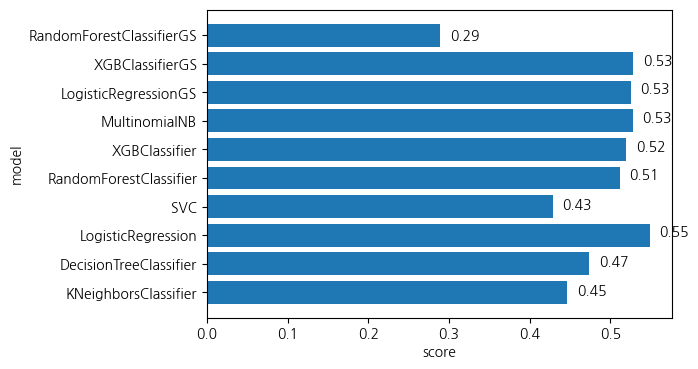

In [ ]:
plt.figure(figsize=(6, 4))
bar = plt.barh(y=list(result_f1_scores), width=result_f1_scores.values())

for rect in bar:
    width = rect.get_width()
    plt.text(width + 0.03, rect.get_y() + width/2.0, '%.2f'%width, ha='center', va='bottom', size=10)

plt.xlabel('score')
plt.ylabel('model')

plt.show()

## 4. Deep Learning(Sequence)
* Sequence로 전처리한 데이터를 이용하여 DNN, 1-D CNN, LSTM 등 3가지 이상의 deep learning 모델 학습 및 성능 분석
> * [Google Tutorial](https://developers.google.com/machine-learning/guides/text-classification)
> * [Tensorflow Tutorial](https://www.tensorflow.org/tutorials/keras/text_classification)
> * [Keras-tutorial](https://keras.io/examples/nlp/text_classification_from_scratch/)

In [ ]:
result_f1_scores_dl = {}

### 4-1. DNN(Deep Neural Network)  
: 깊은 층(layer)으로 이루어진 인공신경망(ANN).  
  입력층(input layer), 은닉층(hidden layer), 출력층(output layer)으로 이루어져 있으며, 각 층은 여러 개의 뉴런(neuron)으로 구성되어 있음.  
  이미지 인식, 자연어 처리, 음성 인식, 게임 등에서 사용됩니다.

In [ ]:
max_words = 2000
embedding_dim = 128
max_len = 196

In [ ]:
seq_x_train.shape, seq_y_train.shape

((2964, 196), (2964, 1))

In [ ]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import backend
from tensorflow.keras.layers import Input, LSTM, GRU, SimpleRNN, Flatten, Dense
from tensorflow.keras.layers import Embedding, Bidirectional, Conv1D, MaxPool1D
from tensorflow.keras.models import Sequential

from tensorflow.keras.losses import sparse_categorical_crossentropy

from sklearn.metrics import classification_report, f1_score

In [ ]:
# 1. 세션 클리어
backend.clear_session()

# 2. 모델 선언
model_dnn = Sequential()

# 3. 레이어 조립
model_dnn.add(Embedding(max_words, 128, input_length=max_len))

model_dnn.add(Flatten())
model_dnn.add(Dense(512, activation='relu'))
model_dnn.add(Dense(5, activation='softmax'))

# 4. 컴파일
model_dnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_dnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 196, 128)          256000    
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 512)               12845568  
                                                                 
 dense_1 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 13,104,133
Trainable params: 13,104,133
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=10,
                   verbose=1)

In [ ]:
model_dnn.fit(seq_x_train, seq_y_train,
            epochs=1000,
            batch_size=128,
            validation_split=0.2,
            verbose=1,
            callbacks=[es])

Epoch 1/1000
19/19 [==============================] - 9s 181ms/step - loss: 1.5007 - accuracy: 0.3893 - val_loss: 1.3083 - val_accuracy: 0.4148
Epoch 2/1000
19/19 [==============================] - 4s 210ms/step - loss: 1.1619 - accuracy: 0.5032 - val_loss: 1.1846 - val_accuracy: 0.4739
Epoch 3/1000
19/19 [==============================] - 3s 150ms/step - loss: 0.9300 - accuracy: 0.6617 - val_loss: 1.0514 - val_accuracy: 0.5447
Epoch 4/1000
19/19 [==============================] - 3s 139ms/step - loss: 0.6715 - accuracy: 0.8216 - val_loss: 0.9317 - val_accuracy: 0.6509
Epoch 5/1000
19/19 [==============================] - 2s 121ms/step - loss: 0.4485 - accuracy: 0.8920 - val_loss: 0.8962 - val_accuracy: 0.6610
Epoch 6/1000
19/19 [==============================] - 1s 72ms/step - loss: 0.2864 - accuracy: 0.9313 - val_loss: 0.8849 - val_accuracy: 0.6644
Epoch 7/1000
19/19 [==============================] - 3s 180ms/step - loss: 0.1831 - accuracy: 0.9570 - val_loss: 0.8717 - val_accuracy: 

In [ ]:
# 예측
y_pred_dnn = model_dnn.predict(seq_x_val).argmax(axis=1)

# 평가
print(classification_report(seq_y_val, y_pred_dnn))
print(f1_score(seq_y_val, y_pred_dnn, average='macro'))

24/24 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.77      0.80      0.79       317
           1       0.69      0.48      0.57       156
           2       0.58      0.59      0.59       129
           3       0.55      0.77      0.64       120
           4       1.00      0.45      0.62        20

    accuracy                           0.68       742
   macro avg       0.72      0.62      0.64       742
weighted avg       0.69      0.68      0.68       742

0.6409107040951014


In [ ]:
result_f1_scores_dl['DNN'] = f1_score(seq_y_val, y_pred_dnn, average='macro')

* model_dnn.add(Dense(512, activation='relu'))  
: 0.6577930576957756
* model_dnn.add(Dense(256, activation='relu'))  
: 0.6309299530078951
* model_dnn.add(Dense(256, activation='relu')) x 2  
: 0.6337622946035808
* model_dnn.add(Dense(128, activation='relu')) x 1  
  model_dnn.add(Dense(256, activation='relu')) x 2  
: 0.5242400988121076
* model_dnn.add(Dense(128, activation='relu')) x 1  
  model_dnn.add(Dense(256, activation='relu')) x 1  
: 0.6396901514899953
* model_dnn.add(Dense(128, activation='relu')) x 1  
  model_dnn.add(Dense(256, activation='relu')) x 1  
  model_dnn.add(Dense(512, activation='relu')) x 1  
: 0.5986814576675888
* model_dnn.add(Dense(64, activation='relu')) x 1  
  model_dnn.add(Dense(128, activation='relu')) x 1  
  model_dnn.add(Dense(256, activation='relu')) x 1  
: 0.5429199545701447
* model_dnn.add(Dense(1024, activation='relu'))  
: 0.656604128776039


### 4-2. 1-D CNN(1-dimensional Convolutional Neural Network)
:1차원 시퀀스 데이터를 처리하기 위한 CNN 모델.  
일반적으로 자연어 처리 분야에서 텍스트 데이터를 다룰 때 많이 사용됨.  
컨볼루션 레이어와 풀링 레이어로 이루어져 있음.

In [ ]:
seq_x_train.shape, seq_y_train.shape

((2964, 196), (2964, 1))

In [ ]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import backend
from tensorflow.keras.layers import Input, LSTM, GRU, SimpleRNN, Flatten, Dense
from tensorflow.keras.layers import Embedding, Bidirectional, Conv1D, MaxPool1D
from tensorflow.keras.models import Sequential

from tensorflow.keras.losses import sparse_categorical_crossentropy

from sklearn.metrics import classification_report, f1_score

In [ ]:
# 1. 세션 클리어
backend.clear_session()

# 2. 모델 선언
model_1dcnn = Sequential()

# 3. 레이어 조립
model_1dcnn.add(Embedding(max_words, 128, input_length=max_len))
model_1dcnn.add(Conv1D(32, 5, activation='swish'))
model_1dcnn.add(MaxPool1D(2))
model_1dcnn.add(Flatten())
model_1dcnn.add(Dense(512, activation='relu'))
model_1dcnn.add(Dense(5, activation='softmax'))

# 4. 컴파일
model_1dcnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_1dcnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 196, 128)          256000    
                                                                 
 conv1d (Conv1D)             (None, 192, 32)           20512     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 96, 32)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 5)                 2565      
                                                        

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=10,
                   verbose=1)

In [ ]:
model_1dcnn.fit(seq_x_train, seq_y_train,
                epochs=1000,
                batch_size=128,
                validation_split=0.2,
                verbose=1,
                callbacks=[es])

Epoch 1/1000
19/19 [==============================] - 10s 247ms/step - loss: 1.3508 - accuracy: 0.4277 - val_loss: 1.2614 - val_accuracy: 0.4165
Epoch 2/1000
19/19 [==============================] - 3s 147ms/step - loss: 1.1593 - accuracy: 0.4838 - val_loss: 1.1401 - val_accuracy: 0.5245
Epoch 3/1000
19/19 [==============================] - 2s 116ms/step - loss: 0.9810 - accuracy: 0.6044 - val_loss: 1.0613 - val_accuracy: 0.5548
Epoch 4/1000
19/19 [==============================] - 2s 102ms/step - loss: 0.8025 - accuracy: 0.7048 - val_loss: 1.0321 - val_accuracy: 0.5750
Epoch 5/1000
19/19 [==============================] - 2s 92ms/step - loss: 0.6189 - accuracy: 0.7938 - val_loss: 0.9923 - val_accuracy: 0.6172
Epoch 6/1000
19/19 [==============================] - 2s 117ms/step - loss: 0.4222 - accuracy: 0.8688 - val_loss: 1.0429 - val_accuracy: 0.6425
Epoch 7/1000
19/19 [==============================] - 2s 130ms/step - loss: 0.3028 - accuracy: 0.9013 - val_loss: 1.1594 - val_accuracy:

In [ ]:
# 예측
y_pred_1dcnn = model_1dcnn.predict(seq_x_val).argmax(axis=1)

# 평가
print(classification_report(seq_y_val, y_pred_1dcnn))
print(f1_score(seq_y_val, y_pred_1dcnn, average='macro'))

24/24 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.78      0.74      0.76       317
           1       0.64      0.60      0.62       156
           2       0.51      0.59      0.55       129
           3       0.57      0.66      0.61       120
           4       0.73      0.40      0.52        20

    accuracy                           0.66       742
   macro avg       0.65      0.60      0.61       742
weighted avg       0.67      0.66      0.66       742

0.610580578920496


In [ ]:
result_f1_scores_dl['1-D DNN'] = f1_score(seq_y_val, y_pred_1dcnn, average='macro')

* model_1dcnn.add(Conv1D(32, 5, activation='swish'))
model_1dcnn.add(MaxPool1D(2))  
: 0.609785605627136
* model_1dcnn.add(Conv1D(64, 5, activation='swish'))  
model_1dcnn.add(MaxPool1D(2))  
: 0.6059842872274327
* model_1dcnn.add(Conv1D(32, 5, activation='swish')) x 2    
model_1dcnn.add(MaxPool1D(2))  
: 0.5227389060379587

### 4-3. LSTM

In [ ]:
seq_x_train.shape, seq_y_train.shape

((2964, 196), (2964, 1))

In [ ]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import backend
from tensorflow.keras.layers import Input, LSTM, GRU, SimpleRNN, Flatten, Dense
from tensorflow.keras.layers import Embedding, Bidirectional, Conv1D, MaxPool1D
from tensorflow.keras.models import Sequential

from tensorflow.keras.losses import sparse_categorical_crossentropy

from sklearn.metrics import classification_report, f1_score

In [ ]:
# 1. 세션 클리어
backend.clear_session()

# 2. 모델 선언
model_lstm = Sequential()

# 3. 레이어 조립
model_lstm.add(Embedding(max_words, 128, input_length=max_len))

model_lstm.add(LSTM(64, return_sequences=True))
model_lstm.add(Flatten())
model_lstm.add(Dense(512, activation='relu'))
model_lstm.add(Dense(5, activation='softmax'))

# 4. 컴파일
model_lstm.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 196, 128)          256000    
                                                                 
 lstm (LSTM)                 (None, 196, 64)           49408     
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 512)               6423040   
                                                                 
 dense_1 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 6,731,013
Trainable params: 6,731,013
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=10,
                   verbose=1)

In [ ]:
model_lstm.fit(seq_x_train, seq_y_train,
            epochs=1000,
            batch_size=128,
            validation_split=0.2,
            verbose=1,
            callbacks=[es])

Epoch 1/1000
19/19 [==============================] - 7s 196ms/step - loss: 1.3579 - accuracy: 0.4087 - val_loss: 1.2865 - val_accuracy: 0.4368
Epoch 2/1000
19/19 [==============================] - 2s 123ms/step - loss: 1.0863 - accuracy: 0.5323 - val_loss: 1.0929 - val_accuracy: 0.5126
Epoch 3/1000
19/19 [==============================] - 3s 154ms/step - loss: 0.7995 - accuracy: 0.7073 - val_loss: 0.8925 - val_accuracy: 0.6459
Epoch 4/1000
19/19 [==============================] - 2s 109ms/step - loss: 0.4909 - accuracy: 0.8351 - val_loss: 0.9325 - val_accuracy: 0.6762
Epoch 5/1000
19/19 [==============================] - 3s 160ms/step - loss: 0.3086 - accuracy: 0.8895 - val_loss: 0.9868 - val_accuracy: 0.6796
Epoch 6/1000
19/19 [==============================] - 2s 92ms/step - loss: 0.2109 - accuracy: 0.9253 - val_loss: 1.2839 - val_accuracy: 0.6594
Epoch 7/1000
19/19 [==============================] - 2s 89ms/step - loss: 0.1353 - accuracy: 0.9540 - val_loss: 1.3970 - val_accuracy: 0

In [ ]:
# 예측
y_pred_lstm = model_lstm.predict(seq_x_val).argmax(axis=1)

# 평가
print(classification_report(seq_y_val, y_pred_lstm))
print(f1_score(seq_y_val, y_pred_lstm, average='macro'))

24/24 [==============================] - 0s 7ms/step
              precision    recall  f1-score   support

           0       0.81      0.75      0.78       317
           1       0.70      0.70      0.70       156
           2       0.50      0.67      0.57       129
           3       0.73      0.64      0.68       120
           4       0.75      0.60      0.67        20

    accuracy                           0.70       742
   macro avg       0.70      0.67      0.68       742
weighted avg       0.72      0.70      0.71       742

0.6795049955703454


In [ ]:
result_f1_scores_dl['LSTM'] = f1_score(seq_y_val, y_pred_lstm, average='macro')

* model_lstm.add(LSTM(64, return_sequences=True))  
: 0.6478266111489399

* 성능 시각화

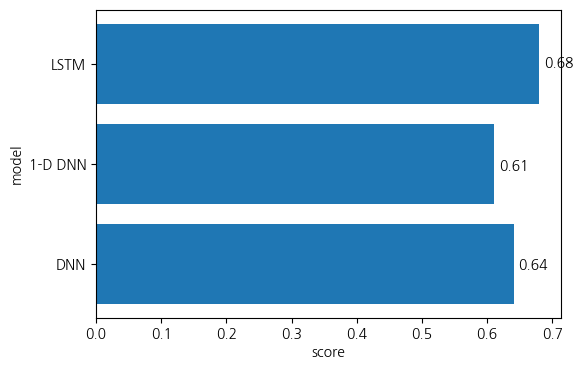

In [ ]:
plt.figure(figsize=(6, 4))
bar = plt.barh(y=list(result_f1_scores_dl), width=result_f1_scores_dl.values())

for rect in bar:
    width = rect.get_width()
    plt.text(width + 0.03, rect.get_y() + width/2.0, '%.2f'%width, ha='center', va='bottom', size=10)

plt.xlabel('score')
plt.ylabel('model')

plt.show()

## 추가

### 1. 나이브 베이즈 (Naive Bayes)  
텍스트 분류 문제에서 널리 사용되는 머신러닝 모델 중 하나.  
베이즈 이론을 기반으로 하며, 문서 내 단어의 출현 빈도를 통해 분류함.

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score

In [ ]:
# 모델
model_nb = MultinomialNB() 

# 학습
model_nb.fit(ngram_x_train, ngram_y_train.values.ravel())

MultinomialNB()

In [ ]:
# 예측
y_pred_nb = model_nb.predict(ngram_x_val)

# 평가
print(classification_report(ngram_y_val, y_pred_nb))
print(f1_score(ngram_y_val, y_pred_nb, average='macro'))

              precision    recall  f1-score   support

           0       0.58      0.87      0.70       317
           1       0.65      0.35      0.46       156
           2       0.59      0.39      0.47       129
           3       0.66      0.47      0.55       120
           4       0.70      0.35      0.47        20

    accuracy                           0.60       742
   macro avg       0.64      0.49      0.53       742
weighted avg       0.61      0.60      0.58       742

0.5279753548532844


In [ ]:
result_f1_scores['MultinomialNB'] = f1_score(ngram_y_val, y_pred_nb, average='macro')

### 성능 시각화

In [ ]:
results = {}
results.update(result_f1_scores)
results.update(result_f1_scores_dl)
results

{'KNeighborsClassifier': 0.44686241463562115,
 'DecisionTreeClassifier': 0.4739506064556268,
 'LogisticRegression': 0.548990834253203,
 'SVC': 0.4284965273756819,
 'RandomForestClassifier': 0.5119545304319355,
 'XGBClassifier': 0.5199454062561479,
 'MultinomialNB': 0.5279753548532844,
 'LogisticRegressionGS': 0.5252294562107709,
 'XGBClassifierGS': 0.5287318698191679,
 'RandomForestClassifierGS': 0.2895417526626396,
 'DNN': 0.6409107040951014,
 '1-D DNN': 0.610580578920496,
 'LSTM': 0.6795049955703454}

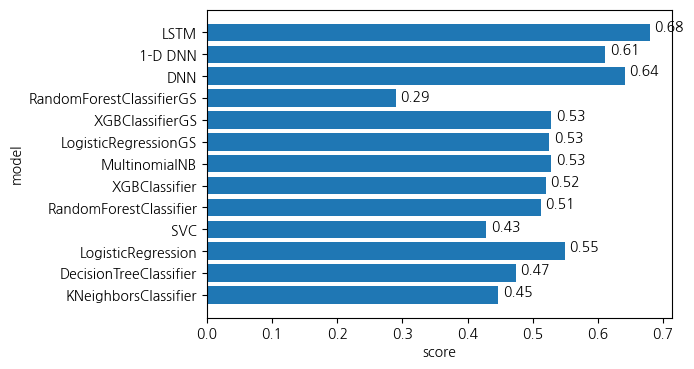

In [ ]:
plt.figure(figsize=(6, 4))
bar = plt.barh(y=list(results), width=results.values())

for rect in bar:
    width = rect.get_width()
    plt.text(width + 0.03, rect.get_y() + width/2.0, '%.2f'%width, ha='center', va='bottom', size=10)

plt.xlabel('score')
plt.ylabel('model')

plt.show()